# Data Mining Group 3
## Members: Moritz Brandl, Lukas Miklautz, Raphael Mitsch


In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys
from dotenv import load_dotenv, find_dotenv

import pandas as pd
import numpy as np

#Visualisation Libraries
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import seaborn as sns
from datetime import datetime
#####
#
# Default way of appending the src directory in the cookiecutter file structure
#
#####

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src')
sys.path.append(src_dir)

   
# import my method from the source code
%aimport data.download
from data.download import DatasetDownloader
%aimport visualization.visualize
from visualization.visualize import plot_track
%aimport data.preprocessing
from data.preprocessing import Preprocessor

# By loading the dotenv we can access Environment variables setted int the dm_mobility_task/.env file
# e.g. I setted there my token like this: "KEY_LUKAS"=1234, similary there is one for KEY_RAPHAEL and KEY_MORITZ
load_dotenv(find_dotenv())
DatasetDownloader.URL = str(os.environ.get("URL"))
DatasetDownloader.USERNAME = str(os.environ.get("LOGINNAME"))
DatasetDownloader.PASSWORD = str(os.environ.get("LOGINPASSWORD"))

In [5]:
recorded_file_names = DatasetDownloader.get_file_names(os.path.join(DatasetDownloader.get_data_dir(),"raw"))
print("We have recorded: {} trips".format(len(recorded_file_names)))

We have recorded: 54 trips


In [64]:
dfs = Preprocessor.preprocess([os.environ.get("KEY_RAPHAEL"),
                               os.environ.get("KEY_MORITZ"),
                               os.environ.get("KEY_LUKAS")])


{'TRAM': 3, 'WALK': 5, 'METRO': 2}
{'TRAM': 0, 'WALK': 1, 'METRO': 2}
{'TRAM': 1, 'WALK': 5, 'METRO': 1}


Get summaries for each scripted trip:

In [91]:
token = os.environ.get("KEY_LUKAS")
trip_info = Preprocessor.get_trip_summaries(dfs[token]["trips"], convert_time=True)
scripted_mask = [True if "scripted" in notes else False for notes in trip_info["notes"]]
trip_info[scripted_mask]

,time,mode,notes,Start,Stop,trip_length
3,2017-11-28 15:40:17.340,WALK,scripted,2017-11-28 15:40:17.456,2017-11-28 15:51:24.672,00:11:07.216000
8,2017-12-06 09:51:23.220,WALK,scripted,2017-12-06 09:51:23.472,2017-12-06 10:02:20.832,00:10:57.360000
11,2017-12-06 14:09:08.037,WALK,scripted,2017-12-06 14:09:08.172,2017-12-06 14:21:13.838,00:12:05.666000
15,2017-12-11 13:35:33.698,WALK,scripted,2017-12-11 13:35:33.980,2017-12-11 13:46:38.741,00:11:04.761000
16,2017-12-11 13:55:58.520,TRAM,scripted,2017-12-11 13:55:58.654,2017-12-11 14:06:01.795,00:10:03.141000
17,2017-12-11 18:57:55.801,METRO,scripted u2mq,2017-12-11 18:57:55.978,2017-12-11 19:09:41.231,00:11:45.253000
18,2017-12-12 13:03:18.528,WALK,scripted,2017-12-12 13:03:18.719,2017-12-12 13:14:34.836,00:11:16.117000


----
## Apply resampling in new time interval for coarser granularity


In [126]:
trips = dfs[token]["trips"]
trip_nr = 3
all_sensors_resampled = Preprocessor.downsample_time_series_per_category(trips[trip_nr]["sensor"],
                                                                         categorical_colnames=["sensor"])

all_sensors_resampled.head(10)

,time,sensor,total,x,y,z
0,2017-11-28 15:40:47,magnetic,24.566869,2.405234,-21.217615,11.463569
1,2017-11-28 15:40:47,linacc,6.419868,-2.765565,1.833413,0.021784
2,2017-11-28 15:40:47,rotation,0.995344,-0.013704,0.635741,0.716954
3,2017-11-28 15:40:47,gyroscope,2.264394,-0.077643,0.178481,0.124715
4,2017-11-28 15:40:47,acceleration,12.842480,-4.156115,11.276687,1.204204
5,2017-11-28 15:40:48,rotation,0.997145,0.075876,-0.249999,-0.205790
6,2017-11-28 15:40:48,acceleration,11.704220,-2.195618,9.670218,0.227845
7,2017-11-28 15:40:48,linacc,6.991401,-0.422332,0.238514,0.369180
8,2017-11-28 15:40:48,magnetic,25.078819,-6.703962,-19.553905,13.496192
9,2017-11-28 15:40:48,gyroscope,1.900397,0.298988,0.211926,-0.196410


## Plot acceleration for one trip

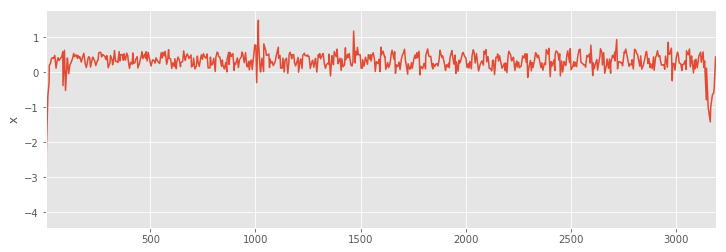

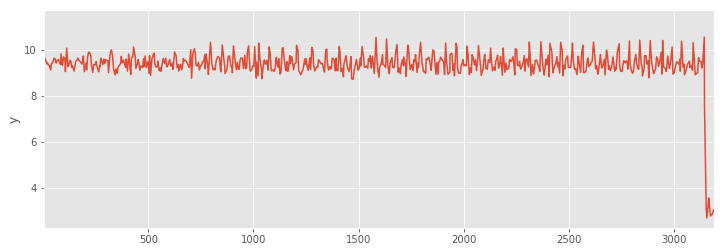

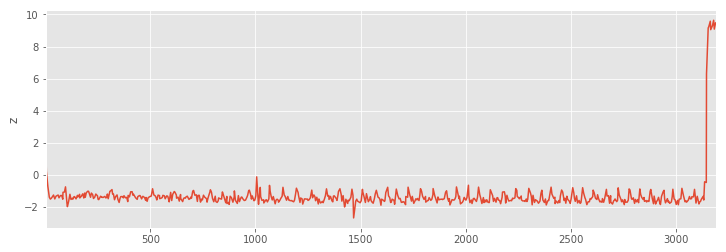

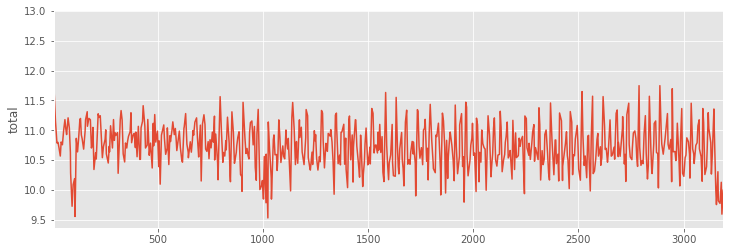

In [127]:
acceleration = all_sensors_resampled[all_sensors_resampled["sensor"] == "acceleration"]
figsize=(12, 4)
acceleration["x"].plot(figsize=figsize);
plt.ylabel("x")
plt.show();

acceleration["y"].plot(figsize=figsize);
plt.ylabel("y")
plt.show();

acceleration["z"].plot(figsize=figsize);
plt.ylabel("z")
plt.show();

acceleration["total"].plot(figsize=figsize);
plt.ylabel("total")
plt.show();

**Plot the gps data on a google map and save it as html to disk:**

In [131]:
trip1_lukas_uni = 1
location_df = trips[trip1_lukas_uni]["location"]
file_name = "gps_test.html"
plot_track(location_df[["longitude", "latitude"]], file_name)

The track can now be viewed at:


In [104]:
os.path.join("reports","maps",file_name)

'reports\\maps\\gps_test.html'